## Map Encampments

### In this notebook, we will display the encampments on a map
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns 

In [2]:
raw_data_path = "../Dataraw/"
annual_data_path = "../Datafiles/"
generated_data_path = "../Datagen/"

In [3]:
#laod  our data frame from past steps 
df_source = pd.read_csv(generated_data_path+'homeless_camp_closed_2023_parks_zip_food_ftr_eng_1.csv', low_memory=False)
df_source.head(1)

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,Shape__Length_y,close_time_bins,is_county_ind,park_distance_bins,closed_days_scaled,park_distance_scaled,ZIP Code,JENI Need Tier,JENI_TIER,food_center_count
0,1-3202726931,01/01/2023 08:26:17 AM,01/31/2023 01:44:42 PM,SR Created,LASAN,Homeless Encampment,Closed,Self Service,Self Service_SAN,NaN,...,2824.807047,1.0,0,2,0.039295,0.054729,90063.0,High,4.0,2.0


In [4]:
df_source.head()

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,Shape__Length_y,close_time_bins,is_county_ind,park_distance_bins,closed_days_scaled,park_distance_scaled,ZIP Code,JENI Need Tier,JENI_TIER,food_center_count
0,1-3202726931,01/01/2023 08:26:17 AM,01/31/2023 01:44:42 PM,SR Created,LASAN,Homeless Encampment,Closed,Self Service,Self Service_SAN,NaN,...,2824.807047,1.0,0,2,0.039295,0.054729,90063.0,High,4.0,2.0
1,1-3202724721,01/01/2023 08:27:28 AM,01/31/2023 01:34:06 PM,SR Created,LASAN,Homeless Encampment,Closed,Self Service,Self Service_SAN,NaN,...,2824.807047,1.0,0,2,0.039295,0.053349,90063.0,High,4.0,2.0
2,1-3202731911,01/01/2023 08:28:21 AM,01/31/2023 01:51:55 PM,SR Created,LASAN,Homeless Encampment,Closed,Self Service,Self Service_SAN,NaN,...,2824.807047,1.0,0,2,0.039295,0.056524,90063.0,High,4.0,2.0
3,1-3202750751,01/01/2023 08:46:07 AM,02/08/2023 02:04:10 PM,SR Created,LASAN,Homeless Encampment,Closed,Self Service,Self Service,NaN,...,2536.166567,1.0,1,1,0.050136,0.026743,90048.0,Moderate,3.0,0.0
4,1-3202758341,01/01/2023 08:46:54 AM,01/06/2023 03:05:58 PM,SR Created,LASAN,Homeless Encampment,Closed,Mobile App,Self Service,Android,...,2190.429976,NaN,1,1,0.005420,0.016142,90020.0,Moderate,3.0,4.0


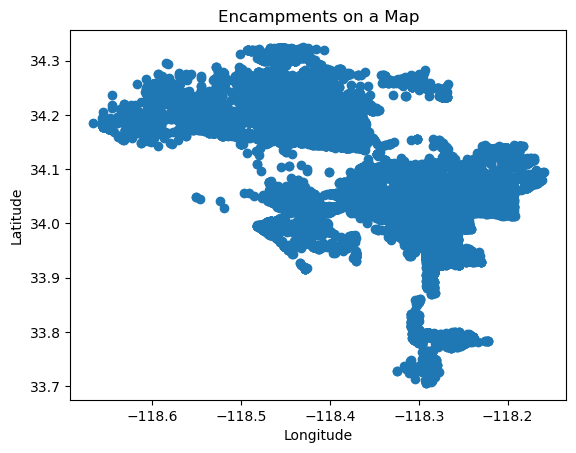

In [5]:
import matplotlib.pyplot as plt

# Sample data
latitude = df_source['Latitude_x'] #[40.7128, 34.0522, 41.8781]
longitude = df_source['Longitude_x'] # [-74.0060, -118.2437, -87.6298]
cities = [  'Los Angeles'  ]

# Create the scatter plot
plt.scatter(longitude, latitude)

# Annotate the points with city names
#for i, city in enumerate(cities):
    #plt.annotate(city, (longitude[i], latitude[i]))

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Encampments on a Map')

# Show the plot
plt.show()

In [ ]:
#  add to environment yml
# pip install geopandas
# pip install contextily

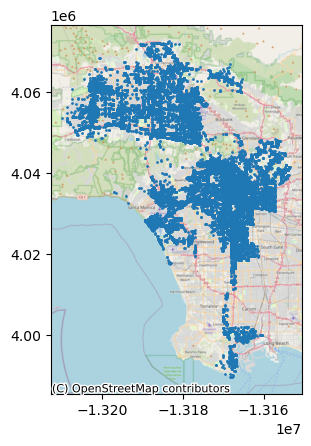

In [14]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx


df_la = pd.DataFrame({
    'city': ['Los-Angeles' ],
    'longitude': [  -118.242766  ],
    'latitude': [  34.053691 ],
     'val': [ 8 ]
     })

df_map =  df_source[['Latitude_x','Longitude_x']]

gdf = gpd.GeoDataFrame(
    df_map, geometry=gpd.points_from_xy(df_map.Longitude_x, df_map.Latitude_x))

# deal with crs
gdf.set_crs(epsg=4326, inplace=True)
map_df = gdf.to_crs(epsg=3857)

# set size of markers
ax = map_df.plot(markersize = 1 ) # = map_df['val'])

# extend size map to USA 
#extent = (-12000000, -10000000, 3000000, 4000000)
#ax.axis(extent)

# add USA base map 
# the line with which Windows 10 had a problem
ctx.add_basemap(ax, source = ctx.providers.OpenStreetMap.Mapnik)

# https://koordinates.com/layer/98160-los-angeles-freeway/

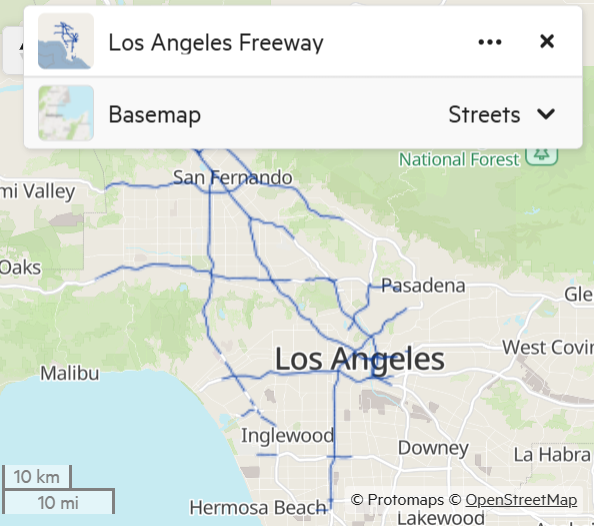